In [1]:
pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

#Read Data

In [3]:
df=pd.read_csv('Task-1.csv',index_col='DATE',parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()

Shape of data (1821, 5)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '13/01/2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '14/01/2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '15/01/2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '16/01/2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\ProgramData\Anaconda3\lib

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-02-01,35.0,50.0,43.0,657,1756
2014-03-01,36.0,45.0,41.0,657,1757
2014-04-01,32.0,41.0,37.0,658,1757
2014-05-01,24.0,38.0,31.0,658,1758


1. Reads a CSV file named "DailyTemp.csv" into a pandas DataFrame object called "df". The DataFrame is created using the pd.read_csv() function, which takes the file path as its first argument. The second argument, index_col='DATE', specifies that the 'DATE' column in the CSV file should be used as the index of the DataFrame. The third argument, parse_dates=True, tells pandas to try to parse the 'DATE' column as a date/time object.

2. Drops any rows that contain missing values (NaN) using the df.dropna() method. This method removes any rows that have at least one missing value. The resulting DataFrame is stored back in the variable "df".

3. Prints the shape of the cleaned DataFrame using the df.shape attribute. The shape attribute returns a tuple that contains the number of rows and columns in the DataFrame.

4. Displays the first few rows of the cleaned DataFrame using the df.head() method. This method returns the first n rows of the DataFrame (by default, n=5). This is a quick way to verify that the data has been loaded correctly and to get a sense of what the data looks like.

#Plot Your Data

<AxesSubplot:xlabel='DATE'>

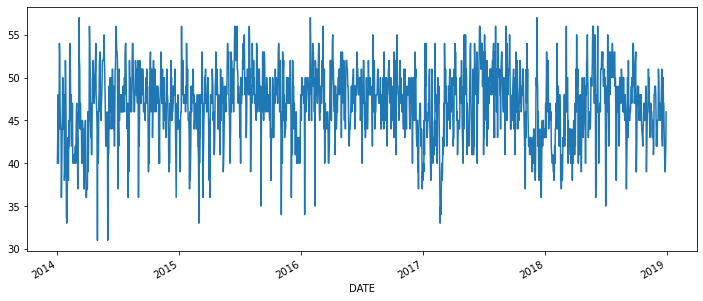

In [4]:
df['AvgTemp'].plot(figsize=(12,5))

#Check For Stationarity

This code defines a function called adf_test that performs an Augmented Dickey-Fuller (ADF) test on a given time series dataset to determine if it is stationary or not. It uses the adfuller function from the statsmodels library to perform the test and prints out the test results, including the test statistic, p-value, number of lags used, number of observations, and critical values. The autolag parameter is set to 'AIC' to automatically choose the number of lags. Overall, this code is useful for time series analysis and forecasting.

In [5]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [6]:
adf_test(df['AvgTemp'])

1. ADF :  -6.554680125068781
2. P-Value :  8.67593748019951e-09
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1808
5. Critical Values :
	 1% :  -3.433972018026501
	 5% :  -2.8631399192826676
	 10% :  -2.5676217442756872


#Figure Out Order for ARIMA Model

In [7]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

This line of code is imports the auto_arima function from the pmdarima library. The auto_arima function is used for automatically finding the best ARIMA model for a given time series dataset.

The code then calls the auto_arima function with a time series dataset (df['AvgTemp']) as input, and assigns the output of the function to a variable called stepwise_fit. The trace=True argument tells the function to print out diagnostic information as it searches for the best model, and suppress_warnings=True argument tells the function to suppress any warning messages that may be produced during the model search.

In [8]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['AvgTemp'], trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.740, Time=1.30 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=0.93 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=1.65 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.343, Time=1.51 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8318.018, Time=1.58 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.189, Time=1.48 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8308.672, Time=1.90 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.041, Time=1.94 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.501, Time=2.11 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8308.646, Time=1.94 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

After the model has been fitted, the summary() method is called on the resulting stepwise_fit object. This method provides a summary of the selected ARIMA model, including the optimal values of the p, d, and q parameters, as well as the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC) for the model. The AIC and BIC are measures of the goodness of fit of the model, with lower values indicating a better fit.

The summary also provides information on the model's coefficients, standard errors, t-values, and p-values, as well as the residuals and their statistics. This information can be used to evaluate the overall performance of the model and to identify any potential issues or areas for improvement.

In [9]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.754
Date:                Wed, 26 Apr 2023   AIC                           8295.508
Time:                        11:16:04   BIC                           8339.565
Sample:                             0   HQIC                          8311.762
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.3294      0.389      3.416      0.001       0.567       2.092
ar.L1          0.9714      0.008    115.985      0.000       0.955       0.988
ma.L1         -0.1218      0.024     -5.122      0.000      -0.168      -0.075
ma.L2         -0.2148      0.024     -8.882      0.000      -0.262      -0.167
ma.L3         -0.2016      0.024     -8.447      0.000      -0.248      -0.155
ma.L4         -0.1370      0.023     -6.041      0.000      -0.181      -0.093
ma.L5         -0.0483      0.024     -1.989      0.047      -0.096      -0.001
sigma2         5.4678      0.170     32.120      0.000       5.134       5.801
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                21.13
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
from statsmodels.tsa.arima.model import ARIMA

#Split Data into Training and Testing

The first line of code print(df.shape) simply prints the size of the DataFrame df, where the first number represents the number of rows and the second number represents the number of columns.

The next two lines of code split the DataFrame into two subsets: train and test. This is done using integer-location based indexing, where train is the first 70% of the rows of df and test is the remaining 30% of rows.

The last two lines of code simply print the sizes of the two subsets (train and test) using .shape, which again returns a tuple with the number of rows and columns. The final line prints the first and last rows of the test subset using .iloc[0] and .iloc[-1], respectively.

This code is often used in machine learning workflows where data is split into training and testing sets to evaluate the performance of a model on new, previously unseen data.

In [11]:
print(df.shape)
train = df.iloc[:int(0.7 * len(df)), :]
test = df.iloc[int(0.7 * len(df)):, :]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(1821, 5)
(1274, 5) (547, 5)
MinTemp      40.0
MaxTemp      57.0
AvgTemp      49.0
Sunrise     547.0
Sunset     1905.0
Name: 2017-01-07 00:00:00, dtype: float64 MinTemp      39.0
MaxTemp      52.0
AvgTemp      46.0
Sunrise     656.0
Sunset     1754.0
Name: 2018-12-30 00:00:00, dtype: float64


## Train the Model

This code uses the ARIMA class to fit an ARIMA model to time series data train['AvgTemp'] with an order of (1, 0, 5), which specifies the number of AR, MA, and I components. The fit() method is used to fit the model, and a summary of the model's parameters is printed using the Summary() method.

In [12]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['AvgTemp'],order=(1, 0, 5))
model=model.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1274
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -2925.614
Date:                Wed, 26 Apr 2023   AIC                           5867.227
Time:                        11:16:05   BIC                           5908.427
Sample:                             0   HQIC                          5882.701
                               - 1274                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.7831      0.874     53.504      0.000      45.069      48.497
ar.L1          0.9847      0.007    143.557      0.000       0.971       0.998
ma.L1         -0.1195      0.027     -4.416      0.000      -0.173      -0.066
ma.L2         -0.2444      0.028     -8.725      0.000      -0.299      -0.190
ma.L3         -0.2093      0.028     -7.487      0.000      -0.264      -0.155
ma.L4         -0.1543      0.027     -5.739      0.000      -0.207      -0.102
ma.L5         -0.0642      0.029     -2.215      0.027      -0.121      -0.007
sigma2         5.7763      0.214     27.036      0.000       5.358       6.195
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                16.23
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                            -0.17
Prob(H) (two-sided):                  0.54   Kurtosis:                         3.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#Make Predictions on Test Set

start is being set to the length of the train data. This likely means that train contains historical data that has been used to train the ARIMA model.
end is being set to the sum of the length of train and test, minus one. This likely means that test contains data that has not been seen by the model before, and we want to make predictions for this unseen data.
model.predict() is being called with start, end, and typ parameters. start and end define the range of the index for which we want to make predictions, and typ specifies whether we want the predictions in the original scale of the data (i.e., 'levels') or in terms of the differences between consecutive observations (i.e., 'differences').
The resulting predictions are being assigned to a new variable called pred, and the name of the series is being changed to 'ARIMA predictions'.
Finally, the index of pred is being set to match the index of the original data frame (df) for the range of start to end (inclusive). This ensures that the predictions are aligned with the original data and can be easily compared to the actual values in test.

In [13]:
start=len(train)
end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
pred.index=df.index[start:end+1]
pred

DATE
2017-01-07    52.371730
2017-02-07    51.825135
2017-03-07    51.312075
2017-04-07    50.876924
2017-05-07    50.749714
                ...    
2018-12-26    46.784085
2018-12-27    46.784070
2018-12-28    46.784056
2018-12-29    46.784041
2018-12-30    46.784027
Name: ARIMA predictions, Length: 547, dtype: float64

<AxesSubplot:xlabel='DATE'>

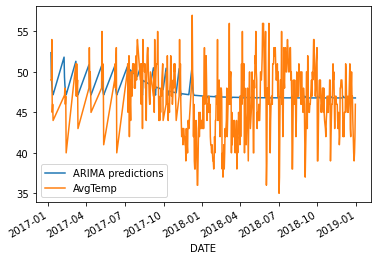

In [14]:
pred.plot(legend='ARIMA Predictions')
test['AvgTemp'].plot(legend=True)

In [15]:
test['AvgTemp'].mean()

46.608775137111515

In [16]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['AvgTemp']))
print(rmse)


4.01998979594289


This code is used to create a residual plot and a density plot of the residuals from a statistical model.


- import matplotlib.pyplot as plt: This line imports the Matplotlib library, specifically the Pyplot module, which is a collection of functions that allow for the creation of various types of plots.

- residuals = model.resid[1:]: This line assigns the residuals of a statistical model to the variable residuals. The [1:] at the end of the line indicates that the first value of the residuals should be excluded, which is often done to account for any initial values or trends in the data.

- fig, ax = plt.subplots(1,2): This line creates a figure with two subplots (one row and two columns) and assigns it to the variables fig and ax. These variables are used to manipulate the plots that will be created in the next two lines.

- residuals.plot(title='Residuals', ax=ax[0]): This line creates a line plot of the residuals with the title "Residuals" and assigns it to the first subplot (ax[0]).

- residuals.plot(title='Density', kind='kde', ax=ax[1]): This line creates a density plot of the residuals with the title "Density" and assigns it to the second subplot (ax[1]). The kind='kde' argument specifies that a kernel density estimate should be used to estimate the density of the residuals.

- plt.show(): This line displays the two plots created in the previous two lines.

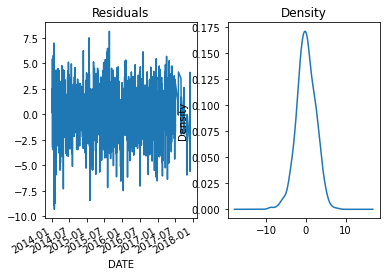

In [17]:
import matplotlib.pyplot as plt
residuals = model.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

- model2=ARIMA(df['AvgTemp'],order=(1, 0, 5)) creates an instance of the ARIMA model with the specified order.
- model2=model2.fit() fits the ARIMA model to the time-series data, estimating the model parameters based on the observed data.
- df.tail() returns the last few rows of the Pandas DataFrame df, which contains the time-series data.

In [18]:
model2=ARIMA(df['AvgTemp'],order=(1, 0, 5))
model2=model2.fit()
df.tail()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753
2018-12-29,36.0,47.0,42.0,655,1753
2018-12-30,39.0,52.0,46.0,656,1754


#For Future Dates
The code is predicting future values for a time series using an ARIMA model. It generates a range of dates for the predictions, uses the model to make predictions for those dates, and then displays the predictions.

In [19]:
index_future_dates=pd.date_range(start='2018-12-30',end='2019-01-29')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2018-12-30    46.418166
2018-12-31    46.113912
2019-01-01    45.617874
2019-01-02    45.249566
2019-01-03    45.116916
2019-01-04    45.136666
2019-01-05    45.156140
2019-01-06    45.175342
2019-01-07    45.194275
2019-01-08    45.212943
2019-01-09    45.231350
2019-01-10    45.249499
2019-01-11    45.267394
2019-01-12    45.285039
2019-01-13    45.302437
2019-01-14    45.319592
2019-01-15    45.336506
2019-01-16    45.353184
2019-01-17    45.369629
2019-01-18    45.385843
2019-01-19    45.401831
2019-01-20    45.417595
2019-01-21    45.433138
2019-01-22    45.448464
2019-01-23    45.463575
2019-01-24    45.478475
2019-01-25    45.493167
2019-01-26    45.507652
2019-01-27    45.521936
2019-01-28    45.536019
2019-01-29    45.549905
Freq: D, Name: ARIMA Predictions, dtype: float64


<AxesSubplot:>

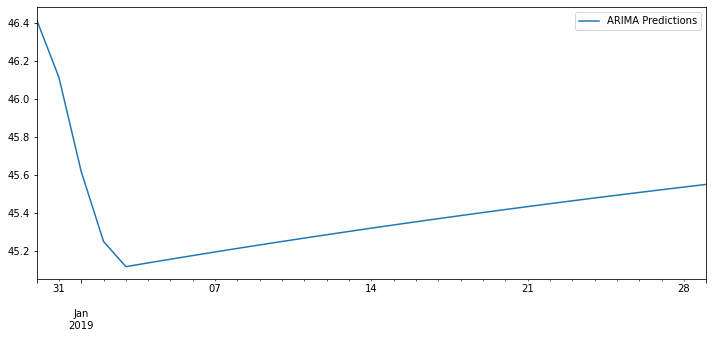

In [20]:
pred.plot(figsize=(12,5),legend=True)
